Mean Squared Error: 37.07493296105277


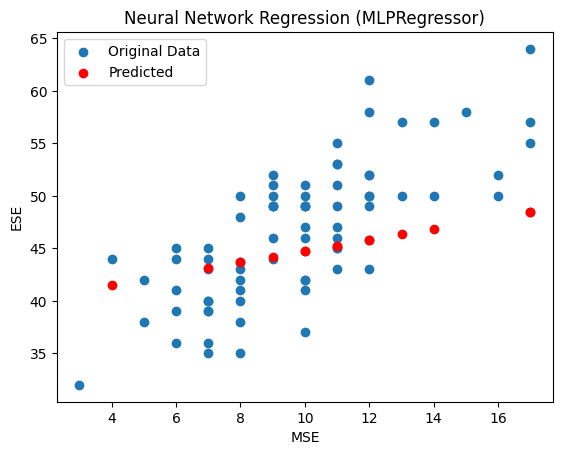

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('AttendanceMarksSA.csv')
X = df[['MSE']].values
y = df['ESE'].values

# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train.ravel())

# Predict
y_pred_scaled = mlp.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate
mse = mean_squared_error(y_test_original, y_pred)
print("Mean Squared Error:", mse)

# Plot
plt.scatter(X, y, label='Original Data')
plt.scatter(scaler_X.inverse_transform(X_test), y_pred, color='red', label='Predicted')
plt.xlabel('MSE')
plt.ylabel('ESE')
plt.title('Neural Network Regression (MLPRegressor)')
plt.legend()
plt.show()
